In [45]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [46]:
from problem import Domain, Wave_1d
from my_utils import  plot_domain_2d, plot_2d_tri

[[0 2]
 [0 1]]


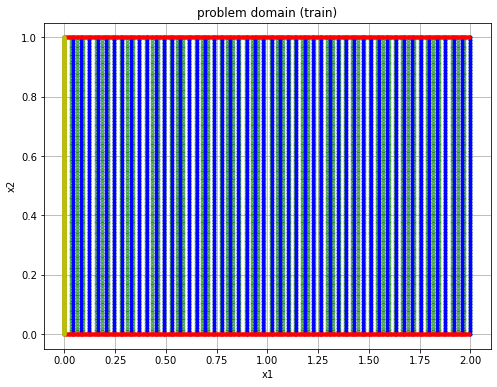

In [47]:
domain = Domain(domain_range=(0,2,0,1),domain_shape='box')
print(domain.domain_range)
x_pde = domain.sample_domain_uniform(mesh_size=[50,100])
x_test = domain.sample_domain_uniform(mesh_size=[66,111])
x_bd = Domain.sample_nd_mesh_bd(mesh_vec=[500,500])
x_ic = x_bd[x_bd[:,0]==-1]

x_bd = x_bd[x_bd[:,0]<1]
x_bd = x_bd[x_bd[:,0]>-1]

x_bd = domain.shift2range(x_bd)
x_ic = domain.shift2range(x_ic)

plot_domain_2d(x_pde=x_pde,x_bd=x_bd,x_test=x_test, x_ic=x_ic)

pde rmse: 5.383018914152043e-17


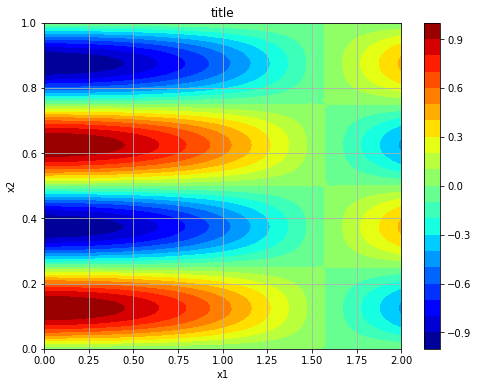

***************************************************
Wave_1d (case=None):
	x_pde:   	(5000, 2)
	x_bd:    	(996, 2)
	x_ic:    	(502, 2)
	x_test:    	(7326, 2)
***************************************************


In [48]:
my_prob = Wave_1d()
x,u = my_prob.check_solution(x_pde)
plot_2d_tri(x[:,0], x[:,1], u[:,0],equal_ratio=False)

# rhs data
target_pde = my_prob.rhs(x_pde)
target_bd = my_prob.u_exact(x_bd)

target_ic = my_prob.u_exact(x_ic)
target_ic['u0'] = 0.5*(np.cos(x_ic[:,[0]] + x_ic[:,[1]]*4*np.pi) - np.cos(-x_ic[:,[0]] + x_ic[:,[1]]*4*np.pi))

target_test = my_prob.u_exact(x_test)

my_prob.set_data(x_pde=x_pde, x_test=x_test, x_bd=x_bd, x_ic=x_ic,
                 target_pde=target_pde, target_test=target_test, target_bd=target_bd, target_ic=target_ic)
print(my_prob)

In [49]:
np.savez('data/data', x_pde=x_pde, x_bd=x_bd, x_test=x_test, x_ic=x_ic,
         target_pde=target_pde, target_bd=target_bd, target_test=target_test, target_ic=target_ic)